Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/My Drive/Skin_Cancer/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/Skin_Cancer/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2218
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train, shuffle=True, batch_size=batch_size, image_size=(img_height,img_width),
                                                       subset="training", validation_split= 0.2, seed = 123)


Found 2218 files belonging to 9 classes.
Using 1775 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train, shuffle=True, batch_size=batch_size, image_size=(img_height,img_width),
                                                     subset="validation", validation_split= 0.2, seed = 123)

Found 2218 files belonging to 9 classes.
Using 443 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
for label_no in range(len(class_names)):
  for images, labels in train_ds.take(1000):
    # Visualize the first image and its label
    if(labels[0].numpy()==label_no):
      plt.imshow(images[0].numpy().astype('uint8'))
      plt.title(f"Label:{labels[0].numpy()}")
      plt.show()
      break



Output hidden; open in https://colab.research.google.com to view.

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Define the model
model = Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  # Define input shape
    Rescaling(1./255),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(9, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 35ms/step - loss: 2.0568 - accuracy: 0.1961 - val_loss: 2.0309 - val_accuracy: 0.1919
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.9506 - accuracy: 0.2428 - val_loss: 1.8330 - val_accuracy: 0.3251
Epoch 3/20
56/56 [==============================] - 2s 31ms/step - loss: 1.8260 - accuracy: 0.3161 - val_loss: 1.8633 - val_accuracy: 0.3047
Epoch 4/20
56/56 [==============================] - 2s 31ms/step - loss: 1.6738 - accuracy: 0.3837 - val_loss: 1.5627 - val_accuracy: 0.4312
Epoch 5/20
56/56 [==============================] - 2s 31ms/step - loss: 1.6812 - accuracy: 0.3927 - val_loss: 1.6183 - val_accuracy: 0.4334
Epoch 6/20
56/56 [==============================] - 2s 31ms/step - loss: 1.5207 - accuracy: 0.4524 - val_loss: 1.5329 - val_accuracy: 0.4628
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.4308 - accuracy: 0.5008 - val_loss: 1.5136 - val_accuracy: 0.4808
Epoch 8/20
56

### Visualizing training results

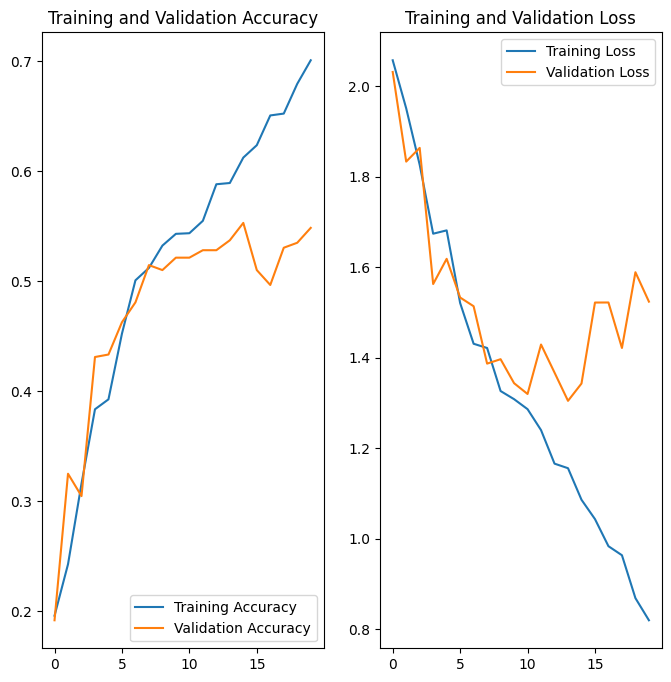

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

From the above plots, we find that the training accuracy is increasing to 70% as the training progresses, but the validation accuracy is saturating at 50%. This indicates that the model is overfitting.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomFlip("vertical"),
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.RandomRotation(factor=(-0.2,0.3)),
    tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    tf.keras.layers.RandomContrast(factor=0.2)
])

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here



### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  # Define input shape
    data_augmentation,
    Rescaling(1./255),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(9, activation='softmax')
])

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 59ms/step - loss: 2.0566 - accuracy: 0.1938 - val_loss: 2.0569 - val_accuracy: 0.2009
Epoch 2/20
56/56 [==============================] - 3s 55ms/step - loss: 1.9233 - accuracy: 0.2794 - val_loss: 1.9015 - val_accuracy: 0.2935
Epoch 3/20
56/56 [==============================] - 3s 55ms/step - loss: 1.8386 - accuracy: 0.3172 - val_loss: 1.7355 - val_accuracy: 0.3950
Epoch 4/20
56/56 [==============================] - 3s 54ms/step - loss: 1.7264 - accuracy: 0.3628 - val_loss: 1.6688 - val_accuracy: 0.3950
Epoch 5/20
56/56 [==============================] - 3s 54ms/step - loss: 1.6702 - accuracy: 0.3955 - val_loss: 1.5848 - val_accuracy: 0.4470
Epoch 6/20
56/56 [==============================] - 3s 54ms/step - loss: 1.6130 - accuracy: 0.4152 - val_loss: 1.6667 - val_accuracy: 0.3883
Epoch 7/20
56/56 [==============================] - 3s 54ms/step - loss: 1.6588 - accuracy: 0.4028 - val_loss: 1.5520 - val_accuracy: 0.4357
Epoch 8/20
56

### Visualizing the results

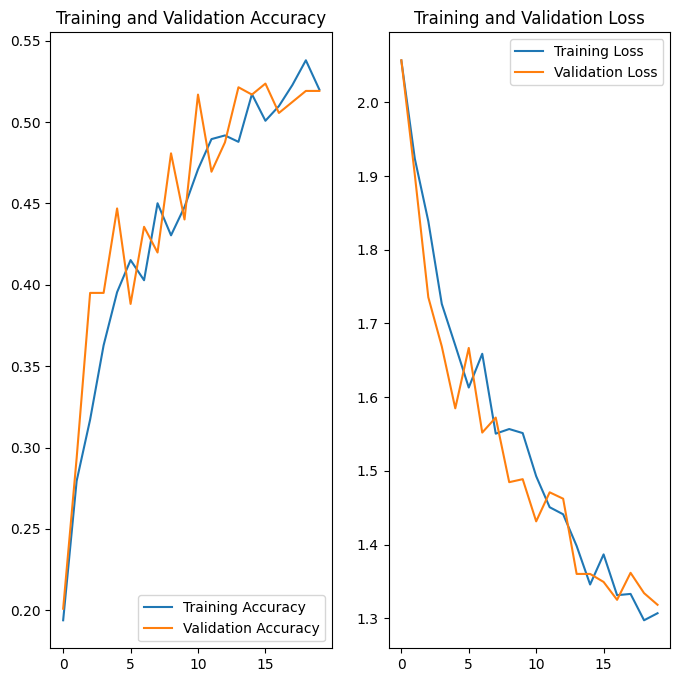

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
labelarr =  np.array([])
for images, labels in train_ds:
  labelarr = np.concatenate([labelarr, labels])

hist = np.histogram(labelarr, bins=9)
print(hist[0])


[ 93 306  75 353 279 354  58 144 113]


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
Class 6 (seborrheic keratosis) has the least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
Class 3 (melanoma) and Class 5 (pigmented benign keratosis) dominate the data set.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= "gdrive/My Drive/Skin_Cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x795BD042E440>: 100%|██████████| 500/500 [00:05<00:00, 93.21 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x795B4E817B50>: 100%|██████████| 500/500 [00:05<00:00, 88.72 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x795BF8126020>: 100%|██████████| 500/500 [00:05<00:00, 93.74 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x795B4C707400>: 100%|██████████| 500/500 [00:19<00:00, 25.56 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x795B4C769EA0>: 100%|██████████| 500/500 [00:17<00:00, 28.84 Samples/s]


Initialised with 441 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x795B4C787F40>: 100%|██████████| 500/500 [00:05<00:00, 91.45 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x795BFB78C250>: 100%|██████████| 500/500 [00:09<00:00, 54.20 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x795BD0351750>: 100%|██████████| 500/500 [00:05<00:00, 87.51 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Skin_Cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x795B4C770670>: 100%|██████████| 500/500 [00:05<00:00, 91.19 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
#path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new = glob.glob(str(data_dir_train) + '/*/output/*.jpg')
path_list_new

[]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

[]

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

NameError: name 'original_df' is not defined

In [ ]:
new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train= "gdrive/My Drive/Skin_Cancer/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6718 files belonging to 9 classes.
Using 5375 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6718 files belonging to 9 classes.
Using 1343 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here

model = Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  # Define input shape
    data_augmentation,
    Rescaling(1./255),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
168/168 [==============================] - 23s 106ms/step - loss: 1.7797 - accuracy: 0.3488 - val_loss: 2.9043 - val_accuracy: 0.1154
Epoch 2/50
168/168 [==============================] - 18s 103ms/step - loss: 1.5320 - accuracy: 0.4229 - val_loss: 2.5093 - val_accuracy: 0.1236
Epoch 3/50
168/168 [==============================] - 18s 104ms/step - loss: 1.4709 - accuracy: 0.4344 - val_loss: 2.1735 - val_accuracy: 0.2718
Epoch 4/50
168/168 [==============================] - 18s 105ms/step - loss: 1.3997 - accuracy: 0.4506 - val_loss: 1.6178 - val_accuracy: 0.3559
Epoch 5/50
168/168 [==============================] - 18s 104ms/step - loss: 1.3742 - accuracy: 0.4549 - val_loss: 1.8663 - val_accuracy: 0.3410
Epoch 6/50
168/168 [==============================] - 18s 104ms/step - loss: 1.3333 - accuracy: 0.4852 - val_loss: 1.8330 - val_accuracy: 0.3261
Epoch 7/50
168/168 [==============================] - 18s 104ms/step - loss: 1.3030 - accuracy: 0.4938 - val_loss: 1.4473 - val_ac

#### **Todo:**  Visualize the model results

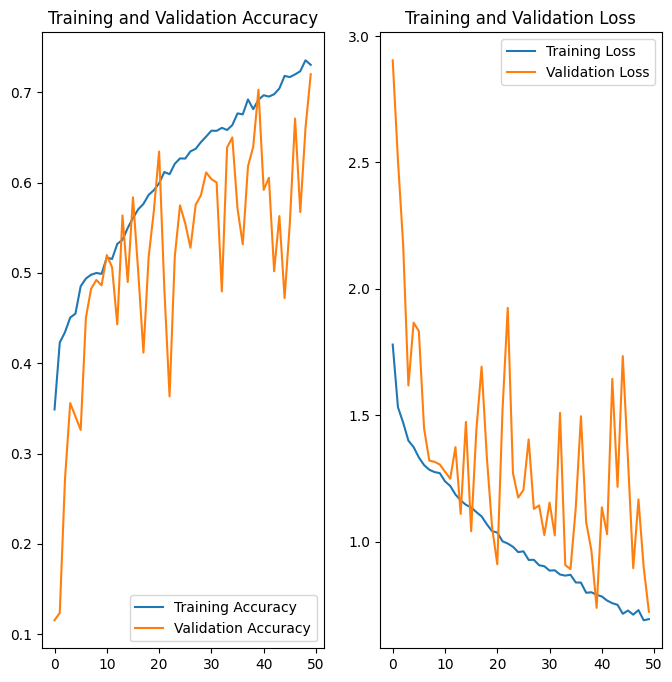

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The difference between the Training accuracy and the Validation accuracy has reduced significantly after using the Dropout and BatchNormalization, and the Class Rebalancing.  